In [2]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import selenium
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
import requests
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC

In [4]:
#Q-1) Write a python program which searches all the product under a particular product from www.amazon.in. The 
#product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
#guitars

driver = webdriver.Chrome() 
driver.get("https://www.amazon.in")



In [5]:
search_query = input("Enter the product you want to search for: ")
search_input = driver.find_element(By.ID, "twotabsearchtextbox")
search_input.send_keys(search_query)
search_input.send_keys(Keys.RETURN) 


print("Search results for:", search_query)
print("=" * 50)


product_titles = driver.find_elements(By.XPATH, '//span[@class="a-size-medium a-color-base a-text-normal"]')
for title in product_titles:
    print(title.text)

Enter the product you want to search for: Guitar
Search results for: Guitar


In [ ]:
##Q-2) . In the above question, now scrape the following details of each product listed in first 3 pages of your search 
##results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then 
##scrape all the products available under that product name. Details to be scraped are: "Brand 
##Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
##“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [249]:
driver = webdriver.Chrome()
driver.get("https://www.amazon.in/")

In [252]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search.send_keys('guitars')
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span')
search.click()

In [253]:
name=[]
rating=[]
price=[]
delivery=[]

In [254]:
Name=driver.find_elements(By.XPATH,'//span[@class="a-size-base-plus a-color-base a-text-normal"]')
for i in Name[0:53]:
    Name=i.text
    name.append(Name)
    
    
Rating=driver.find_elements(By.XPATH,'//span[@class="a-size-base puis-normal-weight-text"]')
for i in Rating[0:53]:
    Rating=i.text
    rating.append(Rating)
    
    
Price=driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
for i in Price[3:56]:
    Price=i.text
    price.append(Price)

    

Delivery=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
for i in Delivery[0:53]:
    Delivery=i.text
    delivery.append(Delivery)
    


In [255]:
url=[]
Url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
Url[0:53]
for i in Url[0:53]:
    print(i.get_attribute('href'))
    url.append(Url)

https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NzA5MjkzNTM0OTU2NjE2OjE2OTQyODE0Njc6c3BfYXRmOjMwMDAzMTMyOTU5MDczMjo6MDo6&url=%2FKadence-A281BK-Professional-Acoustic-Rosewood%2Fdp%2FB0CD7D6C6R%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dguitars%26qid%3D1694281467%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NzA5MjkzNTM0OTU2NjE2OjE2OTQyODE0Njc6c3BfYXRmOjMwMDAyMjkzODAyNjEzMjo6MDo6&url=%2FKadence-Professional-Acoustic-Rosewood-Natural%2Fdp%2FB0CC927DLN%2Fref%3Dsr_1_2_sspa%3Fkeywords%3Dguitars%26qid%3D1694281467%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NzA5MjkzNTM0OTU2NjE2OjE2OTQyODE0Njc6c3BfYXRmOjMwMDAxNTUzNzk3OTIzMjo6MDo6&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB078GTJP5Y%2Fref%3Dsr_1_3_sspa%3Fkeywords%3Dguitars%26qid%3D1694281467%26sr%3D8-3-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NzA5MjkzNT

In [256]:
import pandas as pd
df=pd.DataFrame({'Name':name,'Price':price,'Rating':rating,'Delivery':delivery,'Url':url})
df

,Name,Price,Rating,Delivery,Url
0,Kadence A281BK Professional Acoustic Rosewood ...,"6,599",5.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
1,Kadence A281 Professional Acoustic Rosewood gu...,"6,499",4.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
2,"Kadence rosewood Guitar Frontier Series, Elect...","4,999",3.9,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
3,Kadence Frontier guitar with Online Guitar lea...,"4,299",4.0,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","1,999",4.3,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...
5,"Yamaha F280 Acoustic Rosewood Guitar (Natural,...","7,950",4.0,"Tuesday, 12 September",[<selenium.webdriver.remote.webelement.WebElem...
6,"Kadence rosewood Guitar Frontier Series, Elect...","4,999",4.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
7,Intern INT-38C Lindenwood Acoustic Guitar Kit ...,"2,049",4.1,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
8,Cort AD810 Dreadnought Acoustic Guitar sunburst,"9,899",3.8,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...
9,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"2,999",3.9,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...


In [263]:
search=driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[64]/div/div/span/a[1]')
search.click()

AttributeError: 'list' object has no attribute 'click'

In [232]:
name=[]
rating=[]
price=[]
delivery=[]

Name=driver.find_elements(By.XPATH,'//span[@class="a-size-base-plus a-color-base a-text-normal"]')
for i in Name[0:48]:
    Name=i.text
    name.append(Name)
    
Rating=driver.find_elements(By.XPATH,'//span[@class="a-size-base puis-normal-weight-text"]')
for i in Rating[0:48]:
    Rating=i.text
    rating.append(Rating)

Price=driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
for i in Price[3:51]:
    Price=i.text
    price.append(Price)
    
Delivery=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
for i in Delivery[0:48]:
    Delivery=i.text
    delivery.append(Delivery)
    


    
    
    


In [235]:
Url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
Url[0:48]
for i in Url[0:48]:
    print(i.get_attribute('href'))
    url.append(Url)

https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NDY2MDE2NDQzOTI3NjE2OjE2OTQyODA2MzI6c3BfYXRmOjMwMDAzMTMyOTU5MDczMjo6MDo6&url=%2FKadence-A281BK-Professional-Acoustic-Rosewood%2Fdp%2FB0CD7D6C6R%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dguitars%26qid%3D1694280632%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NDY2MDE2NDQzOTI3NjE2OjE2OTQyODA2MzI6c3BfYXRmOjMwMDAyMjkzODAyNjEzMjo6MDo6&url=%2FKadence-Professional-Acoustic-Rosewood-Natural%2Fdp%2FB0CC927DLN%2Fref%3Dsr_1_2_sspa%3Fkeywords%3Dguitars%26qid%3D1694280632%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NDY2MDE2NDQzOTI3NjE2OjE2OTQyODA2MzI6c3BfYXRmOjMwMDAxNTUzNzk3OTIzMjo6MDo6&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB078GTJP5Y%2Fref%3Dsr_1_3_sspa%3Fkeywords%3Dguitars%26qid%3D1694280632%26sr%3D8-3-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NDY2MDE2ND

In [236]:
print(len(name))
print(len(price))
print(len(rating))
print(len(delivery))
print(len(url))

48
48
48
48
293


In [264]:
import pandas as pd
df1=pd.DataFrame({'Name':name,'Price':price,'Rating':rating,'Delivery':delivery,'URl':url})
df1

,Name,Price,Rating,Delivery,URl
0,Kadence A281BK Professional Acoustic Rosewood ...,"6,599",5.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
1,Kadence A281 Professional Acoustic Rosewood gu...,"6,499",4.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
2,"Kadence rosewood Guitar Frontier Series, Elect...","4,999",3.9,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
3,Kadence Frontier guitar with Online Guitar lea...,"4,299",4.0,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","1,999",4.3,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...
5,"Yamaha F280 Acoustic Rosewood Guitar (Natural,...","7,950",4.0,"Tuesday, 12 September",[<selenium.webdriver.remote.webelement.WebElem...
6,"Kadence rosewood Guitar Frontier Series, Elect...","4,999",4.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
7,Intern INT-38C Lindenwood Acoustic Guitar Kit ...,"2,049",4.1,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...
8,Cort AD810 Dreadnought Acoustic Guitar sunburst,"9,899",3.8,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...
9,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"2,999",3.9,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...


In [266]:
dataframe=[df,df1]

In [267]:
result=pd.concat(dataframe)
result

,Name,Price,Rating,Delivery,Url,URl
0,Kadence A281BK Professional Acoustic Rosewood ...,"6,599",5.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...,NaN
1,Kadence A281 Professional Acoustic Rosewood gu...,"6,499",4.0,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...,NaN
2,"Kadence rosewood Guitar Frontier Series, Elect...","4,999",3.9,"Thursday, 14 September",[<selenium.webdriver.remote.webelement.WebElem...,NaN
3,Kadence Frontier guitar with Online Guitar lea...,"4,299",4.0,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...,NaN
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","1,999",4.3,"Wednesday, 13 September",[<selenium.webdriver.remote.webelement.WebElem...,NaN
...,...,...,...,...,...,...
48,YAMAHA FS80C BLACK CONCERT CUTAWAY GUITAR,"8,990",4.3,"Thursday, 14 September",NaN,[<selenium.webdriver.remote.webelement.WebElem...
49,Fender Squier Acoustic Guitar Cutaway Electron...,"11,880",4.3,"Wednesday, 13 September",NaN,[<selenium.webdriver.remote.webelement.WebElem...
50,Vault DA20 Dreadnought Acoustic Guitar With Gi...,"4,654",4.6,"Tuesday, 12 September",NaN,[<selenium.webdriver.remote.webelement.WebElem...
51,YAMAHA FS80C NATURAL CONCERT CUTAWAY GUITAR,"8,390",3.8,"Wednesday, 13 September",NaN,[<selenium.webdriver.remote.webelement.WebElem...


In [268]:
result.to_csv('file_guitar.csv')

In [269]:
import pandas as pd
df=pd.read_csv('file_guitar.csv')
print(df)

     Unnamed: 0                                               Name   Price  \
0             0  Kadence A281BK Professional Acoustic Rosewood ...   6,599   
1             1  Kadence A281 Professional Acoustic Rosewood gu...   6,499   
2             2  Kadence rosewood Guitar Frontier Series, Elect...   4,999   
3             3  Kadence Frontier guitar with Online Guitar lea...   4,299   
4             4  Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...   1,999   
..          ...                                                ...     ...   
101          48          YAMAHA FS80C BLACK CONCERT CUTAWAY GUITAR   8,990   
102          49  Fender Squier Acoustic Guitar Cutaway Electron...  11,880   
103          50  Vault DA20 Dreadnought Acoustic Guitar With Gi...   4,654   
104          51        YAMAHA FS80C NATURAL CONCERT CUTAWAY GUITAR   8,390   
105          52  Fender Acoustic Guitar Dreadnought Cutaway Ele...  18,419   

     Rating                 Delivery  \
0       5.0   Thursday,

In [68]:
##Q-3) Write a python program to access the search bar and search button on images.google.com and scrape 10 
## images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.
driver = webdriver.Chrome() 
driver.get("https://www.google.com/")
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a')
search.click()




In [69]:
search_=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_.send_keys('Fruits')

In [70]:
search_fruits=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
search_fruits.click()












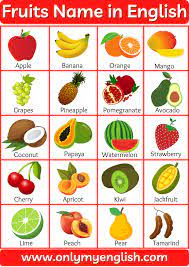
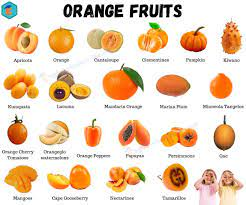
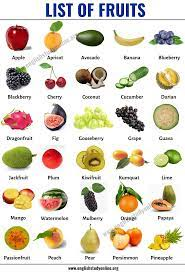
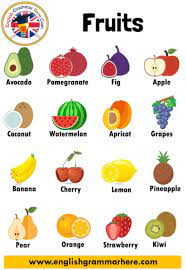
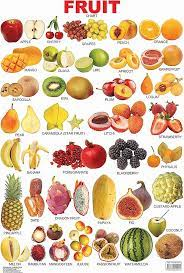
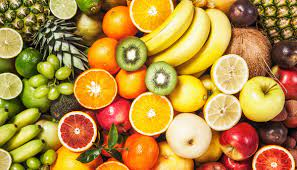
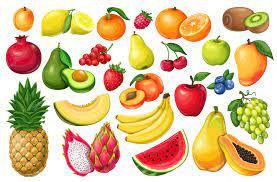
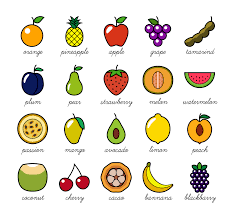
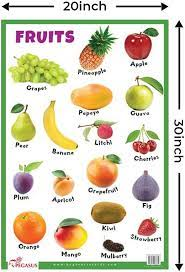
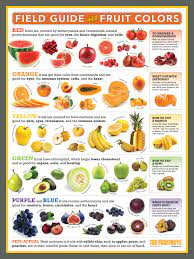

[<selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="173ECCCE8504E2D9264D35FB9E5CB5A1_element_61")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="173ECCCE8504E2D9264D35FB9E5CB5A1_element_63")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="173ECCCE8504E2D9264D35FB9E5CB5A1_element_65")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="173ECCCE8504E2D9264D35FB9E5CB5A1_element_67")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="173ECCCE8504E2D9264D35FB9E5CB5A1_element_69")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="173ECCCE8504E2D9264D35FB9E5CB5A1_element_60")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b69

In [71]:
Fruits=[]
Fruits=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in Fruits[0:10]:
    print(i.get_attribute('src'))
Fruits


In [72]:
images=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[1]/c-wiz/div/a')
images.click()
searc=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a')
searc.click()
search_images=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_images.send_keys('Cars')
cars=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
cars.click()

















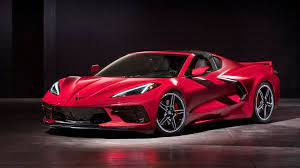
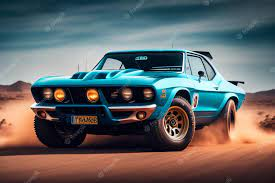
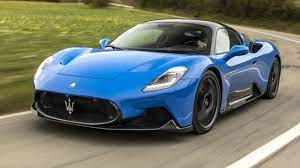
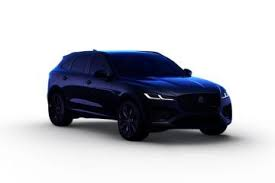
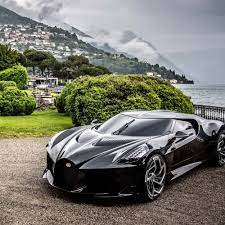
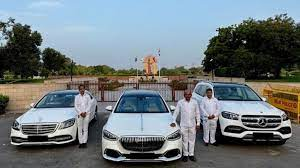
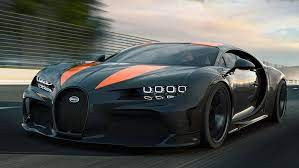
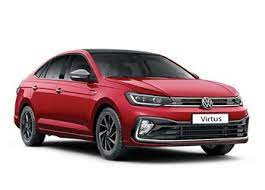
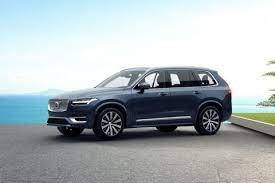
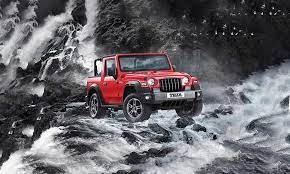

[]

In [73]:
cars=[]
car=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in car[0:10]:
    print(i.get_attribute('src'))
cars

In [74]:
images=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[1]/c-wiz/div/a')
images.click()
searc=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a')
searc.click()
search_images=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_images.send_keys('Machine Learning')


In [75]:
Machine=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
Machine.click()












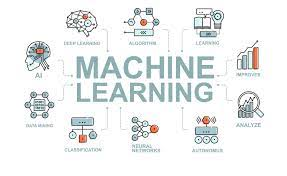
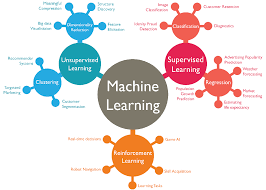
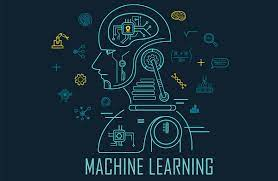
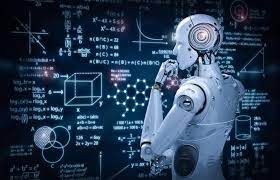
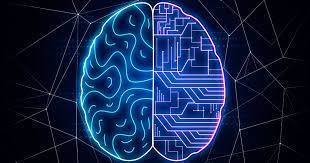
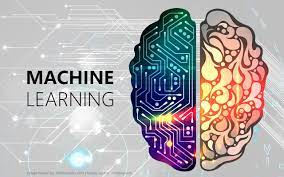
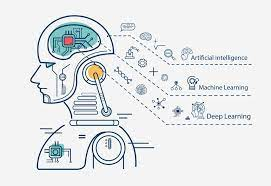
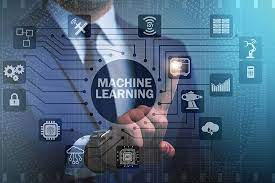
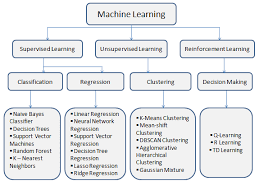
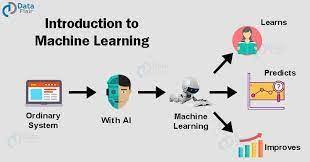

[]

In [76]:
machine_learning=[]
machine=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in machine[0:10]:
    print(i.get_attribute('src'))
machine_learning

In [77]:
images=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[1]/c-wiz/div/a')
images.click()
searc=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a')
searc.click()
search_images=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_images.send_keys('Guitar')
guitar=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
guitar.click()













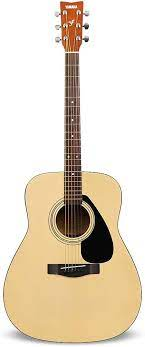
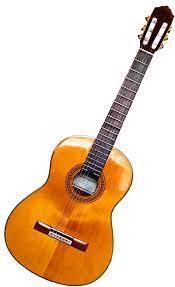
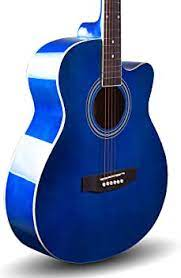
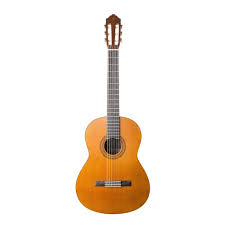
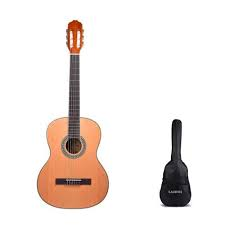
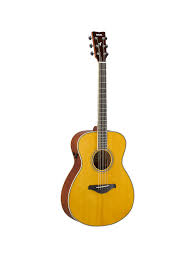
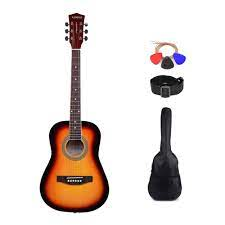
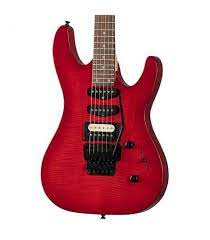
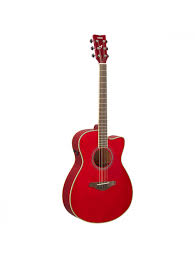
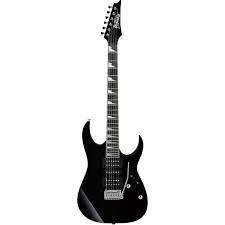

[<selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="FC61B3BC5C8015C38896902ED81F2E72_element_368")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="FC61B3BC5C8015C38896902ED81F2E72_element_369")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="FC61B3BC5C8015C38896902ED81F2E72_element_370")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="FC61B3BC5C8015C38896902ED81F2E72_element_371")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="FC61B3BC5C8015C38896902ED81F2E72_element_372")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="FC61B3BC5C8015C38896902ED81F2E72_element_373")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1

In [78]:
guitars=[]
guitars=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in guitars[0:10]:
    print(i.get_attribute('src'))
guitars

In [79]:
images=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[1]/c-wiz/div/a')
images.click()
searc=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a')
searc.click()
search_images=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search_images.send_keys('Cakes')
cake=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
cake.click()












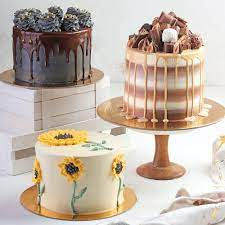
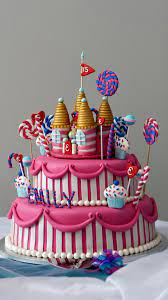
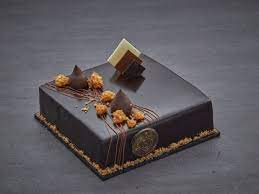
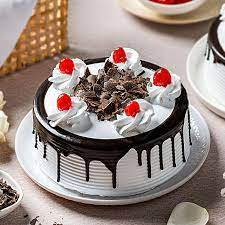
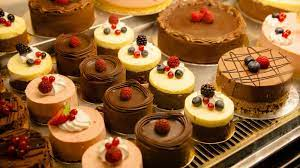
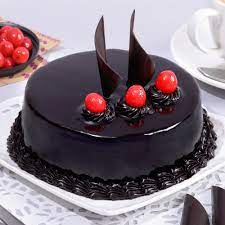
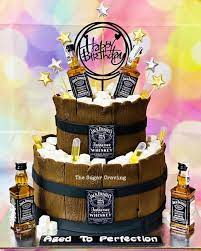
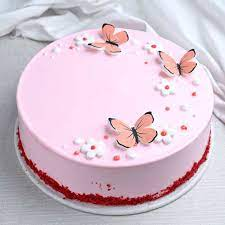
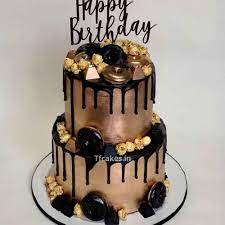
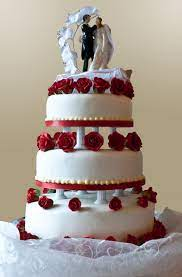

[<selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="4326EE48E5550FE2C32FC5CA6A78FD92_element_453")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="4326EE48E5550FE2C32FC5CA6A78FD92_element_454")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="4326EE48E5550FE2C32FC5CA6A78FD92_element_455")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="4326EE48E5550FE2C32FC5CA6A78FD92_element_456")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="4326EE48E5550FE2C32FC5CA6A78FD92_element_457")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1458b692410", element="4326EE48E5550FE2C32FC5CA6A78FD92_element_458")>,
 <selenium.webdriver.remote.webelement.WebElement (session="35154d137437b012c8ceb1

In [80]:
Cakes=[]
Cakes=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in Cakes[0:10]:
    print(i.get_attribute('src'))
Cakes

In [ ]:
##Q-4) Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
#and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand 
#Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
#“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
#details is missing then replace it by “- “. Save your results in a dataframe and CSV

In [68]:
driver = webdriver.Chrome() 
driver.get("https://www.flipkart.com/")

In [69]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search.send_keys('iphone 14')

In [72]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search.click()

In [73]:
brand_name=[]
Brand_name=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
for i in Brand_name:
    Brand_name=i.text
    brand_name.append(Brand_name)

In [74]:
print(len(brand_name))

24


In [75]:
price=[]
Price=driver.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
for i in Price:
    Price=i.text
    price.append(Price)
print(len(price))

24


In [77]:
details=[]
Details=driver.find_elements(By.XPATH,'//li[@class="rgWa7D"]')
for i in Details[0:24]:
    Details=i.text
    details.append(Details)
print(len(details))

24


In [81]:
Url=[]    
Url=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in Url[0:24]:
    print(i.get_attribute('href'))

https://www.flipkart.com/apple-iphone-14-midnight-128-gb/p/itm9e6293c322a84?pid=MOBGHWFHECFVMDCX&lid=LSTMOBGHWFHECFVMDCXSSCYWA&marketplace=FLIPKART&q=iphone+14&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=c9ca3deb-d227-44de-9ed3-d45476356c7b.MOBGHWFHECFVMDCX.SEARCH&ppt=hp&ppn=homepage&ssid=rki2k7u3b40000001693729663224&qH=860f3715b8db08cd
https://www.flipkart.com/apple-iphone-14-purple-128-gb/p/itm0b581eba85e08?pid=MOBGHWFHQFSQYBFU&lid=LSTMOBGHWFHQFSQYBFUUF0OWI&marketplace=FLIPKART&q=iphone+14&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=c9ca3deb-d227-44de-9ed3-d45476356c7b.MOBGHWFHQFSQYBFU.SEARCH&ppt=hp&ppn=homepage&ssid=rki2k7u3b40000001693729663224&qH=860f3715b8db08cd
https://www.flipkart.com/apple-iphone-14-starlight-128-gb/p/itm3485a56f6e676?pid=MOBGHWFHABH3G73H&lid=LSTMOBGHWFHABH3G73HVXY5AV&marketplace=FLIPKART&q=iphone+14&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=organic&iid=c9ca3deb-d227-44de-9ed3-

In [83]:
df=pd.DataFrame({'b':brand_name,'p':price,'details':details,'URL':Url})
df

,b,p,details,URL
0,"APPLE iPhone 14 (Midnight, 128 GB)","₹67,999",128 GB ROM,<selenium.webdriver.remote.webelement.WebEleme...
1,"APPLE iPhone 14 (Purple, 128 GB)","₹67,999",15.49 cm (6.1 inch) Super Retina XDR Display,<selenium.webdriver.remote.webelement.WebEleme...
2,"APPLE iPhone 14 (Starlight, 128 GB)","₹67,999",12MP + 12MP | 12MP Front Camera,<selenium.webdriver.remote.webelement.WebEleme...
3,"APPLE iPhone 14 (Blue, 128 GB)","₹67,999","A15 Bionic Chip, 6 Core Processor Processor",<selenium.webdriver.remote.webelement.WebEleme...
4,"APPLE iPhone 14 (Midnight, 256 GB)","₹77,999",1 Year Warranty for Phone and 6 Months Warrant...,<selenium.webdriver.remote.webelement.WebEleme...
5,"APPLE iPhone 14 (Purple, 256 GB)","₹77,999",128 GB ROM,<selenium.webdriver.remote.webelement.WebEleme...
6,"APPLE iPhone 14 (Blue, 256 GB)","₹77,999",15.49 cm (6.1 inch) Super Retina XDR Display,<selenium.webdriver.remote.webelement.WebEleme...
7,"APPLE iPhone 14 (Starlight, 256 GB)","₹77,999",12MP + 12MP | 12MP Front Camera,<selenium.webdriver.remote.webelement.WebEleme...
8,"APPLE iPhone 14 ((PRODUCT)RED, 128 GB)","₹66,999","A15 Bionic Chip, 6 Core Processor Processor",<selenium.webdriver.remote.webelement.WebEleme...
9,"APPLE iPhone 14 ((PRODUCT)RED, 256 GB)","₹77,999",1 Year Warranty for Phone and 6 Months Warrant...,<selenium.webdriver.remote.webelement.WebEleme...


In [ ]:
##Q-5) Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [92]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
import re

In [93]:
driver=webdriver.Chrome()
driver.get('https://www.google.com/maps/')

In [98]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
search.send_keys('Delhi')

In [100]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button')
search.click()

In [101]:
url_string=driver.current_url
print('Url Extracted: ', url_string)
lat_lng=re.findall(r'@(.*)data',url_string)
if len(lat_lng):
    lat_lng_list=lat_lng[0].split(",")
    if len(lat_lng_list)>=2:
        lat=lat_lng_list[0]
        lng=lat_lng_list[1]
        
    print("Latitude={},Longitude={}".format(lat,lng))

Url Extracted:  https://www.google.com/maps/place/Delhi/@28.6440836,77.0932313,10z/data=!3m1!4b1!4m6!3m5!1s0x390cfd5b347eb62d:0x37205b715389640!8m2!3d28.7040592!4d77.1024902!16zL20vMDlmMDc?entry=ttu
Latitude=28.6440836,Longitude=77.0932313


In [ ]:
##Q-6) Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [71]:
driver=webdriver.Chrome()
driver.get('https://www.digit.in')

In [82]:
search=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[5]/div[2]/div/div[2]/div/ul[2]/li[2]/a')
search.click()

In [83]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div/div[1]/div[3]/div/div[3]/div[1]/a/h4')
search.click()

In [116]:
names=[]
specification=[]


Names=driver.find_elements(By.XPATH,'//div[@class="TopNumbeHeading"]')
for i in Names:
    Names=i.text
    Names=Names.replace('\n','')
    names.append(Names)


7

In [117]:
specification=[]

Specifications=driver.find_elements(By.XPATH,'//div[@class="Specs-Wrap"]')
for i in Specifications:
    Specifications=i.text
    specification.append(Specifications)


7

In [118]:
df=pd.DataFrame({'Names':names,"Specifications":specification})
df

,Names,Specifications
0,1.Lenovo IdeaPad Gaming 3,"Windows 11 Home\n15.6"" (1920 x 1080)\nAMD Ryze..."
1,2.Acer Aspire 7,"Windows 11 Home\n15.6"" (1920 x 1080)\nAMD Ryze..."
2,3.Lenovo IdeaPad Gaming 3,"Windows 11 Home\n15.6"" (1920 x 1080)\n11th Gen..."
3,4.HP Pavilion Gaming 15,"Windows 10 Home\n15.6"" (1920 x 1080)\n5th Gen ..."
4,5.Acer Aspire 7,"Windows 11 Home\n15.6"" (1920 x 1080)\n12th Gen..."
5,6.Lenovo IdeaPad Gaming 3,"Windows 11 Home\n15.6"" (1920 x 1080)\nAMD Ryze..."
6,7.MSI Bravo 15,"Windows 11 Home\n15.6"" (1920 x 1080)\nAMD Ryze..."


In [ ]:
#Q-7) Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
#“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 
    


In [129]:
driver=webdriver.Chrome()
driver.get('https://www.forbes.com/?sh=f4628b22254c')

In [130]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div')
search.click()

In [131]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[1]')
search.click()

In [132]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]')
search.click()

In [197]:
rank=[]

Rank=driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
for i in Rank:
    Rank=i.text
    rank.append(Rank)
len(rank)

200

In [199]:
name=[]

Name=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
for i in Name[0::4]:
    Name=i.text
    name.append(Name)
len(name)

200

In [200]:
networth=[]

Networth=driver.find_elements(By.XPATH,'//div[@class="Table_netWorth___L4R5 Table_dataCell__2QCve"]')
for i in Networth:
    Networth=i.text
    networth.append(Networth)
    
len(networth)

200

In [201]:
age=[]

Age=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
for i in Age[1::4]:
    Age=i.text
    age.append(Age)
len(age)

200

In [202]:
source=[]

Source=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
for i in Source[2::4]:
    Source=i.text
    source.append(Source)
len(source)


200

In [203]:
industry=[]

Industry=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
for i in Industry[3::4]:
    Industry=i.text
    industry.append(Industry)
len(industry)


200

In [204]:
country=[]

Country=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"]')
for i in Country[4::7]:
    Country=i.text
    country.append(Country)

In [205]:
df=pd.DataFrame({'Rank':rank,'Name':name,'Networth':networth,'Age':age,'Source':source,'Industry':industry,'Country':country})
df

,Rank,Name,Networth,Age,Source,Industry,Country
0,1,Bernard Arnault & family,$211 B,74,LVMH,Fashion & Retail,France
1,2,Elon Musk,$180 B,51,"Tesla, SpaceX",Automotive,United States
2,3,Jeff Bezos,$114 B,59,Amazon,Technology,United States
3,4,Larry Ellison,$107 B,78,Oracle,Technology,United States
4,5,Warren Buffett,$106 B,92,Berkshire Hathaway,Finance & Investments,United States
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,Solar panels,Energy,China
196,195,Luo Liguo & family,$9.6 B,67,Chemicals,Manufacturing,China
197,195,Marijke Mars,$9.6 B,58,"Candy, pet food",Food & Beverage,United States
198,195,Pamela Mars,$9.6 B,62,"Candy, pet food",Food & Beverage,United States


In [ ]:
##Q-8) Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
## from any YouTube Video. 

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [7]:
driver=webdriver.Chrome()
driver.get('https://www.youtube.com/')


In [8]:
search=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/form/div[1]/div[1]/input')
search.send_keys('despacito')




In [9]:
search=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button/yt-icon/yt-icon-shape/icon-shape/div')
search.click()


In [10]:
search=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a')
search.click()

In [14]:
comments = []


Comments_elements = driver.find_elements(By.ID,'comment-content')
for comment_element in Comments_elements[0:500]:
    comment_text = comment_element.text
    comments.append(comment_text)



['2017: People came to listen song. \n2023: People come to check views.',
 'Creé las mejores canciones de cada región y país que visité, y esta canción está en mi lista de reproducción :)',
 "Almost every day I love to sing  Despacito. It increases singer's motivation to sing perfectly this complete song.",
 'amei a música',
 'This song is all time #Masterpiece... This song teaches that there no #Language Barrier in #Music....️️️',
 'Esta canción nunca pasa de moda️',
 'The first viewer must feel like the king of the world...',
 'que nostalgia vim aqui depois de anos e ver como foi incrivel ter vivido a época desta música. sensacional',
 'É uma honra estar aqui depois de 6 anos para rever essa música incrível que ja passou o numero de seres humanos vivos na terra',
 '6 años de su estreno y aún me encanta esta canción  quien en 2023?',
 'É uma honra estar aqui depois de 6 anos para rever essa música incrível que ja passou o numero de seres humanos vivos na terra parabéns ',
 '"9 de sept

In [15]:
votes = []
timing = []



Votes_elements = driver.find_elements(By.ID, "vote-count-middle")
for vote_element in Votes_elements[0:500]:
    vote_text = vote_element.text
    votes.append(vote_text)

Timing_elements = driver.find_elements(By.XPATH, '//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
for timing_element in Timing_elements[0:500]:
    timing_text = timing_element.text
    timing.append(timing_text)

In [16]:
votes

['578K',
 '55',
 '25',
 '18',
 '9',
 '30',
 '421K',
 '267',
 '291',
 '1',
 '240',
 '5',
 '66K',
 '118',
 '2',
 '1',
 '11',
 '1',
 '32K',
 '84']

In [ ]:
#Q-9) Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
#“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
#reviews, privates from price, dorms from price, facilities and property description.

In [4]:
import selenium
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.webdriver.common.keys import Keys
import requests
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [5]:
driver = webdriver.Chrome() 
driver.get("https://www.hostelworld.com/")

In [11]:
search=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input")
search.send_keys('London')

In [12]:
search__=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button")
search__.click()

In [13]:
search__=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[1]")
search__.click()

In [14]:
hostel_name=[]

Hostel_name=driver.find_elements(By.XPATH,'//div[@class="property-name"]')
for i in Hostel_name[1::]:
    Hostel_name=i.text
    hostel_name.append(Hostel_name)
len(hostel_name)

30

In [15]:
distance=[]
distances=driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
for i in distances[0:30]:
    distances=i.text
    distance.append(distances)
len(distance)

30

In [16]:
review=[]
reviews=driver.find_elements(By.XPATH,'//span[@class="keyword"]')
for i in reviews:
    reviews=i.text
    review.append(reviews)
len(review)

30

In [17]:
overall=[]
Overall=driver.find_elements(By.XPATH,'//span[@class="left-margin"]')
for i in Overall:
    Overall=i.text
    overall.append(Overall)
len(overall)

30

In [23]:
dorms=[]
Dorms=driver.find_elements(By.XPATH,'//div[@class="property-accommodation-price"]')
for i in Dorms[2::2]:
    Dorms=i.text
    Dorms=Dorms.replace('\n','')
    dorms.append(Dorms)
dorms

['-20%Dorms From₹3,826₹3,061',
 '-10%Dorms From₹1,940₹1,746',
 'Dorms From₹2,476',
 'Dorms From₹3,207',
 'Dorms From₹2,358',
 'Dorms From₹1,746',
 'Dorms From₹2,453',
 '-5%Dorms From₹1,670₹1,587',
 'Dorms From₹1,617',
 'Dorms From₹977',
 'Dorms From₹4,913',
 'Dorms From₹1,905',
 'Dorms From₹1,081',
 'Dorms From₹1,862',
 'Dorms From₹4,359',
 '-15%Dorms From₹4,344₹3,692',
 '-10%Dorms From₹2,553₹2,297',
 'Dorms From₹2,980',
 'Dorms From₹1,924',
 'Dorms From₹2,586',
 '-10%Dorms From₹1,711₹1,540',
 'Dorms From₹3,620',
 'Dorms From₹3,206',
 'No Dorms Available',
 '-10%Dorms From₹1,997₹1,798',
 'Dorms From₹4,195',
 'Dorms From₹2,751',
 'Dorms From₹6,454',
 'Dorms From₹4,137',
 'Dorms From₹5,171']

In [24]:
len(dorms)

30

In [25]:
privates=[]
Privates=driver.find_elements(By.XPATH,'//div[@class="property-accommodation-price"]')
for i in Privates[1::2]:
    Privates=i.text
    privates.append(Privates)
privates

['No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n₹20,751',
 'Privates From\n₹12,370',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n₹2,477',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n₹6,206',
 '-10%\nPrivates From\n₹9,308\n₹8,377',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n₹31,110',
 'No Privates Available',
 'No Privates Available']

In [27]:
import pandas as pd
df=pd.DataFrame({'Name':hostel_name,'distance':distance,'reviews':review,'Overall':overall,'dorms':dorms,'private':privates})
df

,Name,distance,reviews,Overall,dorms,private
0,Wombat's City Hostel London,- 3.6km from city centre,Fabulous,(15295),"-20%Dorms From₹3,826₹3,061",No Privates Available
1,St Christopher's Village,- 1.8km from city centre,Superb,(12395),"-10%Dorms From₹1,940₹1,746",No Privates Available
2,NX London Hostel,- 6.1km from city centre,Fabulous,(1939),"Dorms From₹2,476",No Privates Available
3,Urbany Hostel London,- 5.4km from city centre,Very Good,(902),"Dorms From₹3,207",No Privates Available
4,Generator London,- 3km from city centre,Superb,(7732),"Dorms From₹2,358","Privates From\n₹20,751"
5,Safestay London Elephant & Castle,- 1.7km from city centre,Very Good,(5100),"Dorms From₹1,746","Privates From\n₹12,370"
6,Clink261,- 3.2km from city centre,Very Good,(396),"Dorms From₹2,453",No Privates Available
7,Phoenix Hostel,- 4.2km from city centre,Fabulous,(4398),"-5%Dorms From₹1,670₹1,587",No Privates Available
8,Safestay London Kensington Holland Park,- 5.8km from city centre,Very Good,(1643),"Dorms From₹1,617",No Privates Available
9,No.8 Willesden Hostel London,- 10km from city centre,Very Good,(5081),Dorms From₹977,"Privates From\n₹2,477"
